## Trees
Trees are similar to linked lists in that each node holds some data and is connected to other nodes. Trees ara not linear data structure since each node can be connected to multiple other nodes.
Terminology for trees:
- the first node is called root
- a link connedting one node to another is called an edge
- node can be connected to none or multiple other nodes called children.
- a node can have only one parent node, i.e. only one node that lead to that
- nodes that do not have children are called leaves
- the height of a tree is the maximum number of edges from the root to a leaf
- the height of a node is the maximum number of idges from the node to a lead
- the tree size is the number of nodes in the tree

### Types of trees

- Binary Trees: Each node has at most two children, the left and the right
- Binary Search Trees: Is a Binary Tree with the requirement that for every node n, any node l belonging to the left subtree of n and any node r belonging to the right subtree of n satisfy the inequality: $$\text{l.data} \, \le \, \text{n.data} \, \le \text{r.data}$$
  - the above means that all values in the left subtree of a node ar smaller or equal to the value of that node and all values in the right subtree are bigger or equal
  - the left are right sub-trees are also binary search trees
  - BST can allow duplicate values, but with consistancy, i.e. always place a duplicate values either to the left or to the right.
- other types of trees:
  - AVL trees, Red-Black trees: balance out the difference in height of the left and right sub-tree.
  - B trees, Segment trees

### Types of Binary trees
- Balanced Binary tree: has at most one difference in the height of the left and right sub-trees for every node
- complete Binary tree: has all levels full of nodes except the last level, which can be full or filled from left to right. A complete BT is balanced.
- full binary tree: each node has either 0 or 2 children
- perfect: all leaf nodes are on the same level, all levels are full of nodes and all internal nodes have exactly two children. A perfect binary tree is balance, complete and full

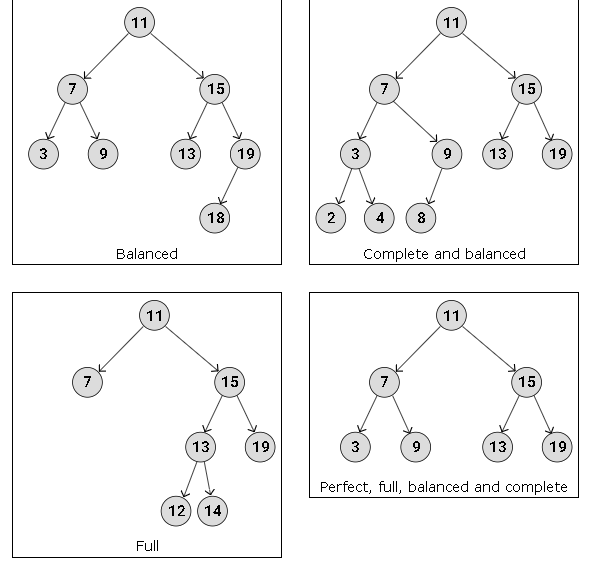

In [6]:
from PIL import Image
from IPython.display import display
img = Image.open('binary_trees_types.png')
display(img)

### Operations on BST
- insert an element into the tree
- delete an element from the tree
- traverse and sort the tree
- search for an element in the tree

In [28]:
from collections import deque

class Node:

    def __init__(self, key):

        self.key = key
        self.parent = None
        self.left = None
        self.right = None

class BinarySearchTree:
    '''Implementation of the Binary Search tree
    Duplicate values are always place to the left subtree of a node with the same value.
    '''

    def __init__(self):
        self.root = None

    def insert(self, key):
        '''Iteratiely Insert a node into the BST as a leaf at the appropriate position.
        If the key is already present in the tree at node node_key, it places the key at the right-most node after node_key.
        Returns the inserted node.
        '''
        
        new_node = Node(key)

        # if there is no node at the tree
        if self.root == None:
            self.root = new_node
            return new_node
        
        pointer = self.root
        # find the node that should be the parent of the new node
        while pointer.left != None or pointer.right != None:
            if key<= pointer.key:
                # check if the pointer has no left child, but has a right child
                if pointer.left == None:
                    break
                else:
                    pointer = pointer.left
            else:
                if pointer.right == None:
                    break
                else:
                    pointer = pointer.right
        
        if key<=pointer.key:
            pointer.left = new_node
        else:
            pointer.right = new_node

        new_node.parent = pointer

        
    def search(self, key, head_node: Node = None):
        '''Iteratively Search if the key is present in the sub-tree with root the head_node.
        If no head_node is specified it searches in the whole tree.
        Returns the node with that key or None if the key doesn't exist in the sub-tree.
        '''
        # set the head_note to the root if no specified
        if head_node == None:
            head_node = self.root

        while head_node!=None:
            # return the node with the desired key
            if head_node.key == key:
                return head_node
             
            # go to the left or rigth sub-tree
            if key < head_node.key :
                head_node = head_node.left
            else:
                head_node = head_node.right
        
        return 
    
    def inorder_traversal(self, node: Node = 0, arr: list = None):
        '''traverse the sub-tree starting at node node, from the left most node to the rightmost node
        and returns a list with the elements sorted.
        If no node if provided the whole tree is considered
        '''

        if node == 0:
            node = self.root
            arr=[]
        
        if node:
            self.inorder_traversal(node.left, arr)

            # print the node, its parent and children
            left_child = node.left.key if node.left !=None else None
            right_child = node.right.key if node.right !=None else None
            parent = node.parent.key if node.parent!=None else None
            print(f'node with key {node.key} has left child {left_child}, right child {right_child} and parent {parent}')
            
            arr.append(node.key)

            self.inorder_traversal(node.right, arr)

        return arr

    def get_min(self, node: Node = None):
        '''returns the minimum element in the sub-tree with root the node.
        If no node is provided the whole tree will be considered
        '''

        if node == None:
            node = self.root

        while node.left!=None:
            node = node.left
        
        return node
    

    def get_max(self, node: Node = None):
        '''returns the maximum element in the sub-tree with root the node.
        If no node is provided the whole tree will be considered
        '''

        if node == None:
            node = self.root

        while node.right!=None:
            node = node.right
        
        return node

    def _replace(self, node_to_delete, node):
        '''replace the subtree at node_to_delete as a child of its parent with a subtree at node
        '''

        # deleting node is the root
        if node_to_delete.parent == None:
            self.root = node
        # deleting node is a left child
        elif node_to_delete == node_to_delete.parent.left:
            node_to_delete.parent.left = node
        #deleting node is a right child
        else:
            node_to_delete.parent.right = node
        # set the parent of the replacing node if it is not none.
        if node!=None:
            node.parent = node_to_delete.parent    
        
    
    def delete(self, key):
        '''Delete the node with value key, if it is present in the tree.
        There are 4 cases to examine.
        '''

        node_to_delete = self.search(key)

        if node_to_delete == None:
            return
        
        # case 1: node to delete doesn't have a left child
        if node_to_delete.left == None:
            self._replace(node_to_delete, node_to_delete.right)
        # case 2: node to delete doesn't have a right child
        elif node_to_delete.right == None:
            self._replace(node_to_delete, node_to_delete.left)
        else:
            # find the minimum node or the right subtree 
            node_to_replace = self.get_min(node_to_delete.right)
            # case 3: the minimum element is not the right child of node_to_delete
            if node_to_replace.parent != node_to_delete:
                # replace it with it's child subtree
                self._replace(node_to_replace, node_to_replace.right)
                # set the right minimum node as the root of the right sub-tree
                node_to_replace.right = node_to_delete.right
                node_to_replace.parent = node_to_delete
            
            # now the right-minimum node is the right child of the node_to_delete
            self._replace(node_to_delete, node_to_replace)
            # connect the left subtree to the node_to_replace
            node_to_replace.left = node_to_delete.left
            node_to_replace.left.parent = node_to_replace

    def height(self, node = 0):
        '''Return the height of the given node.
        If no node if provided will return the height of the tree.
        '''

        if node == 0 :
            node = self.root
        
        if node.left==None and node.right==None:
            return 0
        elif node.left==None:
            return self.height(node.right)+1
        elif node.right==None:
            return self.height(node.left)+1
        else:
            return max(self.height(node.left), self.height(node.right))+1
        
    # def length(self):
    #     '''Returns the horizontal length of the tree
    #     '''
    #     pointer = self.root
    #     left_length = 0
    #     while pointer.left!=None:
    #         pointer = pointer.left
    #         left_length+=1
    #     pointer = self.root
    #     right_length = 0
    #     while pointer.right!=None:
    #         pointer = pointer.right
    #         right_length+=1

    #     return left_length+right_length+1
    
    def get_level(self, n: int):
        '''returns a deque with the nodes at a specific level n
        Note that 0<=n<=height(root)
        '''

        if not 0<= n <= self.height():
            print(f"level {n} doesn't exist")
            return 
        
    def tree_repr(self):
       
        if self.root == None:
            return ''
        
        # keep the nodes at a specific level
        current_level = deque()
        current_level.append((self.root, 0))
        print(str(self.root.key)+' '+'0')
        while current_level:
            next_level = deque()
            while current_level:
                node, pos = current_level.popleft()
                if node.left:
                    next_level.append((node.left, pos-1))
                if node.right:
                    next_level.append((node.right, pos+1))
            print(' '.join([str(node.key)+' '+str(pos) for node,pos in next_level]))
            current_level = next_level

    def tree_array_repr(self):
       
        if self.root == None:
            return [None]
        
        arr = [self.root.key]

        # keep the nodes at a specific level
        current_level = deque()
        current_level.append(self.root)
        while current_level:
            next_level = deque()
            while current_level:
                node = current_level.popleft()
                # if node:
                #     arr.append(node.key)
                # else:
                #     arr.append(None)
                arr.append(node.left.key) if node.left else arr.append(None)
                arr.append(node.right.key) if node.right else arr.append(None)

                if node.left:
                    next_level.append(node.left)
                
                if node.right:
                    next_level.append(node.right)

            current_level = next_level
        
        return arr


In [29]:
import unittest

class TestBinarySearchTree(unittest.TestCase):

    def test_tree_array_repr(self):
        bst0 = BinarySearchTree()
        self.assertEqual(bst0.tree_array_repr(), [None])
        bst1 = BinarySearchTree()
        bst1.insert(1000)
        self.assertEqual(bst1.tree_array_repr(), [1000, None, None])
        bst2 = BinarySearchTree()
        for i in [10,6,8,3,20,15,25,12,17,22,27]:
            bst2.insert(i)
        self.assertEqual(bst2.tree_array_repr(), [10,6,20,3,8,15,25]+[None]*4+[12,17,22,27]+[None]*8)


unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestBinarySearchTree))

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [26]:
bst = BinarySearchTree()
for i in [10,6,8,3,20,15,25,12,17,22,27]:
    bst.insert(i)
print(f'the root of the tree is {bst.root.key}')
print(f'tree in sorted order: {bst.inorder_traversal()}')
print(f'tree in children order: {bst.tree_array_repr()}')
print(f'minimum element: {bst.get_min().key}')
print(f'maximum element: {bst.get_max().key}')

the root of the tree is 10
node with key 3 has left child None, right child None and parent 6
node with key 6 has left child 3, right child 8 and parent 10
node with key 8 has left child None, right child None and parent 6
node with key 10 has left child 6, right child 20 and parent None
node with key 12 has left child None, right child None and parent 15
node with key 15 has left child 12, right child 17 and parent 20
node with key 17 has left child None, right child None and parent 15
node with key 20 has left child 15, right child 25 and parent 10
node with key 22 has left child None, right child None and parent 25
node with key 25 has left child 22, right child 27 and parent 20
node with key 27 has left child None, right child None and parent 25
tree in sorted order: [3, 6, 8, 10, 12, 15, 17, 20, 22, 25, 27]
tree in children order: [10, 6, 20, 3, 8, 15, 25, None, None, None, None, 12, 17, 22, 27, None, None, None, None, None, None, None, None]
minimum element: 3
maximum element: 27

In [3]:
nodes = [3,10,20,17,25]
heights =[bst.height(bst.search(n)) for n in nodes]
for n, h in zip(nodes,heights):
    print(f'node {n} has height {h}')

node 3 has height 0
node 10 has height 3
node 20 has height 2
node 17 has height 0
node 25 has height 1


In [4]:
bst.tree_repr()

10 0
6 -1 20 1
3 -2 8 0 15 0 25 2
12 -1 17 1 22 1 27 3



In [46]:
'abcde'.center(10)

'  abcde   '

In [5]:
bst.delete(6)
bst.inorder_traversal()

node with key 3 has left child None, right child None and parent 8
node with key 8 has left child 3, right child None and parent 10
node with key 10 has left child 8, right child 20 and parent None
node with key 12 has left child None, right child None and parent 15
node with key 15 has left child 12, right child 17 and parent 20
node with key 17 has left child None, right child None and parent 15
node with key 20 has left child 15, right child 25 and parent 10
node with key 22 has left child None, right child None and parent 25
node with key 25 has left child 22, right child 27 and parent 20
node with key 27 has left child None, right child None and parent 25


[3, 8, 10, 12, 15, 17, 20, 22, 25, 27]

### AVL Trees
An AVL tree is a self-balanced Binary Search Tree in which at each node the differenc in height of the left and right sub-tree is at most one. This iss achieved by performing rotations.


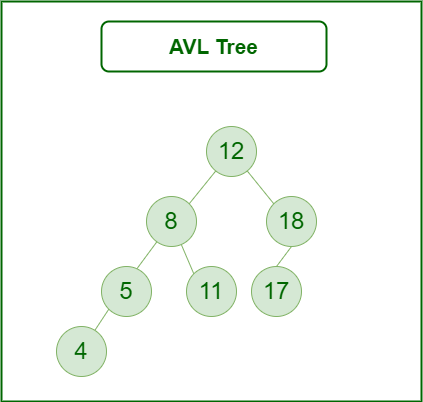

In [49]:
from PIL import Image
from IPython.display import display
avl_tree_img = Image.open('avl_tree.png')
display(avl_tree_img) 

### Red-Black Trees
A Red-Black tree is a Binary Search Tree in which every node has a color black or red and it must satisfy the following properties:
- The root and the leaves are Black
- Every Red node must have Black children
- On every path from a given node to a leaf the number of black nodes must be the same, and this must hold for every node.

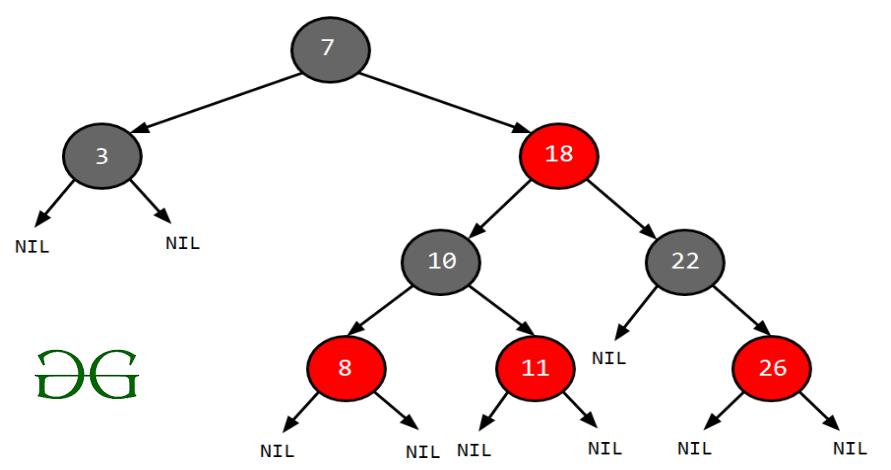

In [50]:
from PIL import Image
from IPython.display import display
red_black_tree_img = Image.open('red_black_tree.png')
display(red_black_tree_img) 

### B-trees, B+ trees

Properties of B-trees:
- All leaves are on the same level
- .....


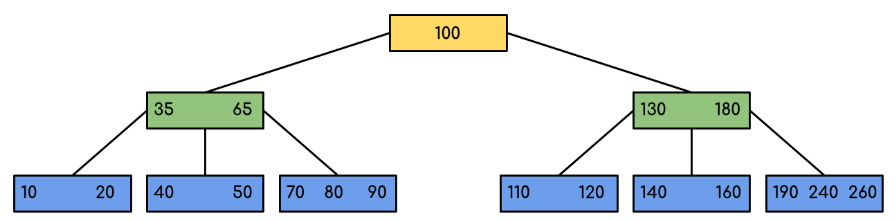

In [48]:
from PIL import Image
from IPython.display import display
b_tree_img = Image.open('b_tree.png')
display(b_tree_img) 